#### Nama : Natanael Primus L.H.N
#### NIM : 2209106029
#### Link dataset : https://www.kaggle.com/datasets/atulyakumar98/pothole-detection-dataset

### Imprt library yang dipakai

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import shutil 
import random
import splitfolders
import keras.utils as image
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

### Split dataset menjadi Train, Test, dan Val

In [76]:
splitfolders.ratio('img/', output="img/", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 681 files [00:03, 199.27 files/s]


### Atur path ke folder train, test, dan val

In [2]:
train_img_path = "img/train/"
eval_img_path = "img/val/"
test_img_path = "img/test/"

### Membuat arsitektur CNN

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode='nearest',
    validation_split=0.2,
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

eval_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',\
    shuffle=False,
    subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 436 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 544 images belonging to 2 classes.


### Buat model sequential

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

### Training

In [9]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,    
    steps_per_epoch=8,
    epochs=100,
    validation_data=eval_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
8/8 [==============================] - 13s 1s/step - loss: 0.7278 - accuracy: 0.5000 - val_loss: 0.6899 - val_accuracy: 0.5185
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.6790 - accuracy: 0.5943 - val_loss: 0.6387 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 0.5631 - accuracy: 0.7172 - val_loss: 0.4673 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 8s 1s/step - loss: 0.3984 - accuracy: 0.8750 - val_loss: 0.5112 - val_accuracy: 0.7315
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.5172 - accuracy: 0.7422 - val_loss: 0.4607 - val_accuracy: 0.7778
Epoch 6/100
8/8 [==============================] - 9s 1s/step - loss: 0.4193 - accuracy: 0.8156 - val_loss: 0.5302 - val_accuracy: 0.7315
Epoch 7/100
8/8 [==============================] - 9s 1s/step - loss: 0.4309 - accuracy: 0.8074 - val_loss: 0.4809 - val_accuracy: 0.7685
Epoch 8/100
8/8 [================

### Evaluasi

In [11]:
model.evaluate(eval_generator)

4/4 [==============================] - 2s 366ms/step - loss: 0.5152 - accuracy: 0.8704


[0.5151503086090088, 0.8703703880310059]

### Grafik

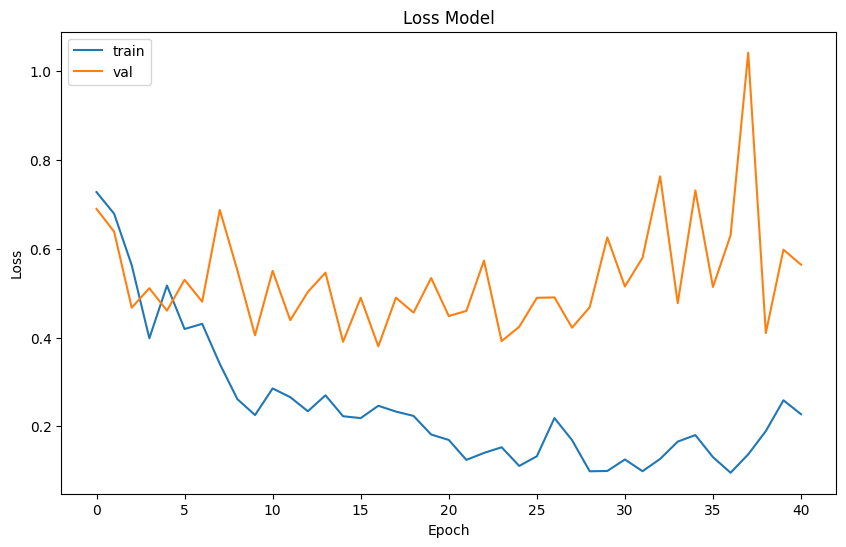

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

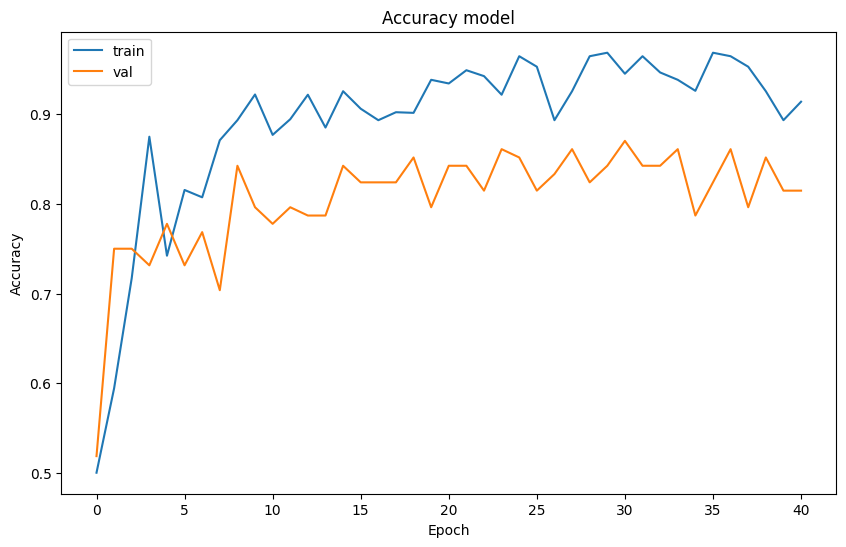

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Mencoba model yang sudah dilatih

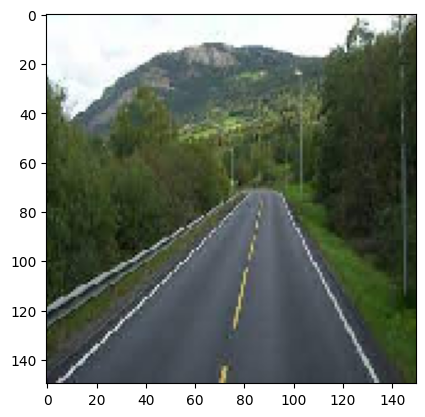

1/1 [==============================] - 0s 41ms/step
The image does not contain a pothole.


In [48]:
path = '_not_pothole.jpg' 
img = image.load_img(path, target_size=(150,150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=10)

if classes[0] > 0.5:
    print("The image contains a pothole.")
else:
    print("The image does not contain a pothole.")


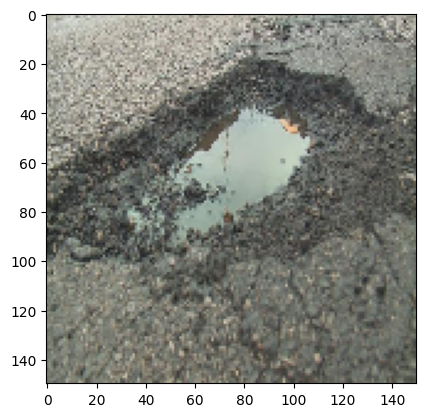

1/1 [==============================] - 0s 31ms/step
The image contains a pothole.


In [49]:
path = '_pothole.jpg' 
img = image.load_img(path, target_size=(150,150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=10)

if classes[0] > 0.5:
    print("The image contains a pothole.")
else:
    print("The image does not contain a pothole.")
